<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/Polynomial_linear_regression_with_single_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#
# Create x and y values for datapoints
#

dataset_x = np.linspace(-1, 1, 100)
print(f'dataset_x.shape = {dataset_x.shape}')

# Our model will need to learn these values
K2 = 3
K1 = 2
B = 1

rng = np.random.default_rng()
dataset_y = K2 * dataset_x**2 + K1 * dataset_x + B + rng.standard_normal(*dataset_x.shape) * 0.33

dataset_x.shape = (100,)


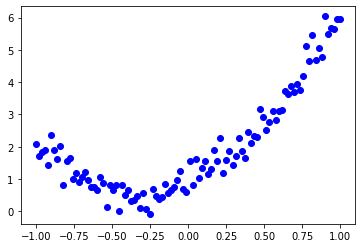

In [3]:
#
# (Optional) Plot data points
#

plt.plot(dataset_x, dataset_y, 'bo')
plt.show()

In [4]:
#
# Create a training and test datasets
#

dataset = list(zip(dataset_x, dataset_y))
print(f'dataset = {dataset}')

df_dataset = pd.DataFrame.from_records(dataset, columns = ['x', 'y'] )

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')
dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

dataset = [(-1.0, 2.0768783617158064), (-0.9797979797979798, 1.6988480493300404), (-0.9595959595959596, 1.8387577062789153), (-0.9393939393939394, 1.9077216107867607), (-0.9191919191919192, 1.4208655317769154), (-0.898989898989899, 2.372597288339214), (-0.8787878787878788, 1.8826372222609837), (-0.8585858585858586, 1.6262435244762372), (-0.8383838383838383, 2.016174758115087), (-0.8181818181818181, 0.8186733162904473), (-0.797979797979798, 1.562757207081349), (-0.7777777777777778, 1.644136838965086), (-0.7575757575757576, 1.0106116447202904), (-0.7373737373737373, 1.1691744711552268), (-0.7171717171717171, 0.9199049755378688), (-0.696969696969697, 1.0687679082891577), (-0.6767676767676767, 1.2256314733899747), (-0.6565656565656566, 0.9684736307686992), (-0.6363636363636364, 0.7484870964012266), (-0.6161616161616161, 0.7507411281599146), (-0.5959595959595959, 0.6540474779855396), (-0.5757575757575757, 1.0480744320768376), (-0.5555555555555556, 0.8634162172937273), (-0.5353535353535352, 

In [5]:
#
# Build a model with a single neuron which takes a single feature as an input
#

FEATURES_COUNT = 1

model = tf.keras.Sequential([
    layers.Dense(input_shape=(FEATURES_COUNT,), units=1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
#
# Define function which plots a scatter graph of dataset datapoints and a line
# defined with its (x, y) datapoints.
#
 
def plot_fn(dataset_x, dataset_y, x, y):
  plt.plot(dataset_x, dataset_y, 'bo', label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

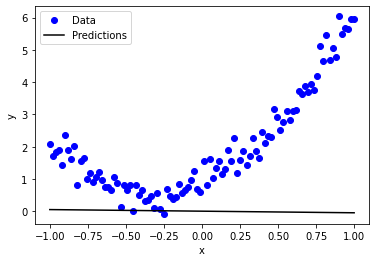

In [8]:
#
# (Optional)
# Check the output of the untrained model
#

y = model.predict(dataset_x)
plot_fn(dataset_x, dataset_y, dataset_x, y)

In [9]:
#
# Compile the model
#
# This sets:
# - loss function e.g. Mean Absolute Error or Mean Squared Error
# - optimization algorithm e.g. Adam or Stochastic Gradient Descent and its
#.  arguments e.g. learning rate for Gradient Descent
#

learning_rate = 0.1
optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
# optimizer=tf.optimizers.SGD(learning_rate=learning_rate)

model.compile(
    optimizer=optimizer,
    loss='mean_absolute_error')

In [10]:
#
# Train the model
#

%%time
history = model.fit(
    dataset_train['x'], dataset_train['y'],
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 2.3 s, sys: 85.8 ms, total: 2.38 s
Wall time: 2.66 s


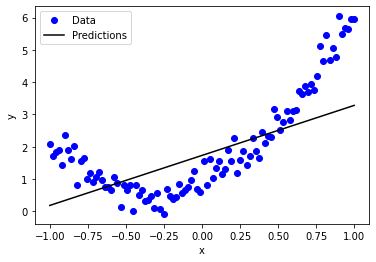

In [11]:
# 
# Plot the final function approximation
#

y = model.predict(dataset_x)
plot_fn(dataset_x, dataset_y, dataset_x, y)

We can see that a (single) neuron with a single input feature is only capable of learning a linear hypothesis: `h(x) = k*x + b`. To learn more complex functions of single independent variable, like e.g. `h(x) = k3 * x^3 + k2 * x^2 + k1 * x + k0` we need to treat powers of `x` as independent new variables (separate features) and feed them as inputs into the neuron.

In [12]:
#
# Let's expand our dataset with artificially created features:
#

# Dataset points follow the curve line which looks like polynomial of 2nd
# degree: y = b + k1 * x + k2 * x^2
# So features are x and x and x^2 and label is y.

dataset = list(zip(dataset_x, dataset_x**2,  dataset_y))
print(f'dataset = {dataset}') # list of (x, x^2, y) tuples

df_dataset =  pd.DataFrame.from_records(dataset, columns = ['x', 'x2', 'y'] )

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')
dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

dataset = [(-1.0, 1.0, 2.0768783617158064), (-0.9797979797979798, 0.9600040812162024, 1.6988480493300404), (-0.9595959595959596, 0.9208244056728905, 1.8387577062789153), (-0.9393939393939394, 0.8824609733700643, 1.9077216107867607), (-0.9191919191919192, 0.8449137843077238, 1.4208655317769154), (-0.898989898989899, 0.8081828384858688, 2.372597288339214), (-0.8787878787878788, 0.7722681359044995, 1.8826372222609837), (-0.8585858585858586, 0.7371696765636159, 1.6262435244762372), (-0.8383838383838383, 0.7028874604632179, 2.016174758115087), (-0.8181818181818181, 0.6694214876033057, 0.8186733162904473), (-0.797979797979798, 0.6367717579838792, 1.562757207081349), (-0.7777777777777778, 0.6049382716049383, 1.644136838965086), (-0.7575757575757576, 0.573921028466483, 1.0106116447202904), (-0.7373737373737373, 0.5437200285685134, 1.1691744711552268), (-0.7171717171717171, 0.5143352719110295, 0.9199049755378688), (-0.696969696969697, 0.4857667584940313, 1.0687679082891577), (-0.676767676767676

In [13]:
#
# Build a model with a single neuron which takes 2 features as (2) inputs
#

FEATURES_COUNT = 2

model = tf.keras.Sequential([
    layers.Dense(input_shape=(FEATURES_COUNT,), units=1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [14]:
#
# Compile the model
# We'll use the same learning_rate and optimizer as before
#
 
model.compile(
    optimizer=optimizer,
    loss='mean_absolute_error')

In [15]:
# https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc

# tensor_input = list(zip(x, x2))

# Input layer of our model expects input_shape=(2,) which means a 2-element tuple (x and x^2).
# Let's merge x and x2 into a numpy matrix:
tensor_input = np.array([dataset_train['x'], dataset_train['x2']])
# tensor_input = tensor_input.T
tensor_input.shape

(2, 80)

In [16]:
tensor_input = np.stack((dataset_train['x'], dataset_train['x2']), axis=-1)
tensor_input.shape

(80, 2)

In [17]:
#
# Train the model
#

%%time
history = model.fit(
    tensor_input, dataset_train['y'],
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 2.32 s, sys: 102 ms, total: 2.42 s
Wall time: 2.54 s


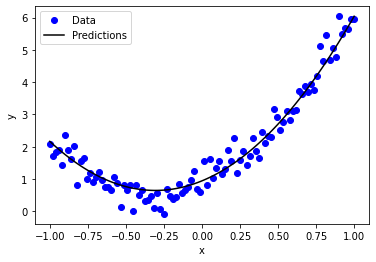

In [18]:
# 
# Plot the final function approximation
#
y = model.predict(np.stack((dataset_x, dataset_x**2), axis=-1))
plot_fn(dataset_x, dataset_y, dataset_x, y)

In [20]:
#
# Print the values of learned and original model parameters.
#

# Check out the weights' values of the trained model
for layer in model.layers: print(layer.get_config(), layer.get_weights())

first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]

print(f'Learned 1st degree coefficient is {first_layer_weights[0]} while original is {K1}')
print(f'Learned 2nd degree coefficient is {first_layer_weights[1]} while original is {K2}')
print(f'Learned intercept is {first_layer_biases[0]} while original is {B}')

{'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 2), 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[1.939015 ],
       [3.1628537]], dtype=float32), array([0.94044065], dtype=float32)]
Learned 1st degree coefficient is [1.939015] while original is 2
Learned 2nd degree coefficient is [3.1628537] while original is 3
Learned intercept is 0.9404406547546387 while original is 1
